In [1]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
import tensorflow as tf
import numpy as np
import os
import pandas as pd #資料處理
import torch
import matplotlib.pyplot as plt
from PIL import Image

#from load_image.py import image_path

# 設定dataset路徑
project_path = r"D:\NTUT\Weather_AI\self-project\GAN\weather-GAN"
train_data_path = str(project_path + r"\Train")
output_data_path = str(project_path + r"output_data")


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14384540537732895283
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13684714637484431142
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
# Setup GPU
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
for gpu in gpus :
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [44]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
class My_Dataset(Dataset) :
    def __init__(self, path, transform=None) :
        super().__init__()
        self.image_files = os.listdir(path)
        self.list_files = []
        for file in self.image_files :
            self.list_files.append(os.path.join(path, file))

    # Indicate the total size of the dataset
    def __len__(self) :
        return len(self.image_files)
    
    # 1. Read from file (using numpy.fromfile, PIL.Image.open)
    # 2. Preprocess the data (torchvision.Transform).
    # 3. Return the data (e.g. image and label)
    def __getitem__(self, index) :
        image = Image.open(self.list_files[index]).convert('RGB')
        if transform is None :
            return image
        else :
            image = transform(image)
            return image

#讀取圖片
if __name__ == '__main__' :
    #path_image = r"D:\NTUT\Weather_AI\self-project\GAN\weather-GAN\Train"
    path_image = train_data_path
    train_data = My_Dataset(path_image, transform=transform)
    train_dataloader = DataLoader(train_data, batch_size=10, shuffle=False)
    for image in train_dataloader :
        print(image.shape)
        #4(張), 3(RGB三通道), 3600(長), 3600(寬)縮成256*256
        break

torch.Size([10, 3, 64, 64])


In [7]:
# dir_path = os.path.dirname('./Train/')
# all_image = os.listdir(dir_path)
# #all_image.sort(key=lambda x:int(x[:-4]))
# print(all_image)

In [7]:
IMAGE_PATH = r'.\Typhoon_1' # Typhoon_1 #train_data
image_list = []
for dirpath, dirnames, filename in os.walk(IMAGE_PATH) :
    for filename in [f for f in filename if f.endswith(".jpg")] :
        image_list.append(dirpath +"\\"+ filename)
image_list.sort(key=lambda x:int(x[12:-4])) # 12:-4 # 13:-4
print(image_list)

['.\\Typhoon_1\\530.jpg', '.\\Typhoon_1\\531.jpg', '.\\Typhoon_1\\532.jpg', '.\\Typhoon_1\\533.jpg', '.\\Typhoon_1\\534.jpg', '.\\Typhoon_1\\535.jpg', '.\\Typhoon_1\\536.jpg', '.\\Typhoon_1\\537.jpg', '.\\Typhoon_1\\538.jpg', '.\\Typhoon_1\\539.jpg', '.\\Typhoon_1\\540.jpg', '.\\Typhoon_1\\541.jpg', '.\\Typhoon_1\\542.jpg', '.\\Typhoon_1\\543.jpg', '.\\Typhoon_1\\544.jpg', '.\\Typhoon_1\\545.jpg', '.\\Typhoon_1\\546.jpg', '.\\Typhoon_1\\547.jpg', '.\\Typhoon_1\\548.jpg', '.\\Typhoon_1\\549.jpg', '.\\Typhoon_1\\550.jpg', '.\\Typhoon_1\\551.jpg', '.\\Typhoon_1\\552.jpg', '.\\Typhoon_1\\553.jpg', '.\\Typhoon_1\\554.jpg', '.\\Typhoon_1\\555.jpg', '.\\Typhoon_1\\556.jpg', '.\\Typhoon_1\\557.jpg', '.\\Typhoon_1\\558.jpg', '.\\Typhoon_1\\559.jpg', '.\\Typhoon_1\\560.jpg', '.\\Typhoon_1\\561.jpg', '.\\Typhoon_1\\562.jpg', '.\\Typhoon_1\\563.jpg', '.\\Typhoon_1\\564.jpg', '.\\Typhoon_1\\565.jpg', '.\\Typhoon_1\\566.jpg', '.\\Typhoon_1\\567.jpg', '.\\Typhoon_1\\568.jpg', '.\\Typhoon_1\\569.jpg',

In [8]:
#img_path = ['./Train/0.jpg', './Train/1.jpg', './Train/2.jpg', './Train/3.jpg', './Train/4.jpg',  './Train/5.jpg'] 

batch_size = 1
image_paths_dataset = tf.data.Dataset.from_tensor_slices(image_list)

def load_and_preprocess_image(image_path) :
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels = 3) #RGB圖像可視為一個3維矩陣，透過decode_jpeg可將jpeg格式的圖片解碼成三維矩陣
    image = tf.image.resize(image, [64, 64])
    image = tf.image.per_image_standardization(image)
    return image

image_dataset = image_paths_dataset.map(load_and_preprocess_image)
image_dataset = image_dataset.batch(batch_size)

for i in image_dataset :
    print(i)

tf.Tensor(
[[[[-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   ...
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]]

  [[-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   ...
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]]

  [[-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   ...
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]]

  ...

  [[-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   [-0.10125194 -0.10125194 -0.10125194]
   ...
   [-0.10125194  0.90647334 -0.10125194]
   [-0.10125194  0.973655   -0.10125194]
   [-

In [9]:
iterator = iter(image_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


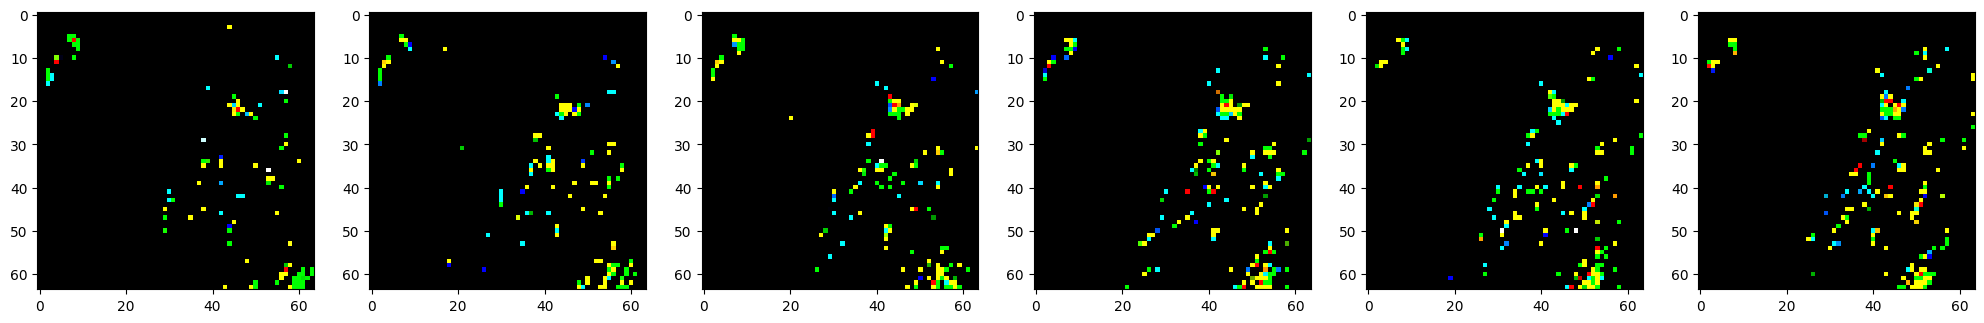

In [10]:
num_rows = 1
num_cols = 6
plt.figure(figsize=(25, 25))

for i in range(num_rows * num_cols) :
    batch = iterator.get_next()
    image = batch[0]
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image.numpy())
    #plt.axis('off')

plt.show()

Build Nerual Network

In [12]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the NN
from tensorflow.keras.layers import Conv2D, Conv3D, Dense, Flatten, Reshape, LeakyReLU, Dropout, BatchNormalization, ConvLSTM2D, Conv2DTranspose


Build generator

In [13]:
# n_step = 6 #使用前6個時間段的圖去預測下一張圖

#     model = Sequential()

#     model.add(LSTM(50, activation='LeakyReLU', return_sequences=False, input_shape=(8, 64, 64, 3)))

#     model.add(Dense(1))

In [13]:
def build_generator() :
    model = Sequential()

    model.add(ConvLSTM2D(filters=64, 
                        kernel_size = (5*5), 
                        input_shape = (6, 64, 64, 3), 
                        padding = 'same', 
                        activation = LeakyReLU(alpha=0.01), 
                        return_sequences = True))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=64, 
                        kernel_size = (3*3), 
                        padding = 'same', 
                        activation = LeakyReLU(alpha=0.01), 
                        return_sequences = True))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=64, 
                        kernel_size = (1*1), 
                        input_shape = (6, 64, 64, 3), 
                        padding = 'same', 
                        activation = LeakyReLU(alpha=0.01), 
                        return_sequences = True))
    model.add(BatchNormalization())

    model.add(Conv3D(filters = 3,
                    kernel_size = (3*3*3), 
                    activation = 'sigmoid', 
                    padding = 'same', 
                    data_format = 'channels_last'))


    return model

In [14]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 6, 64, 64, 64)     10720256  
                                                                 
 batch_normalization (BatchN  (None, 6, 64, 64, 64)    256       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 6, 64, 64, 64)     2654464   
                                                                 
 batch_normalization_1 (Batc  (None, 6, 64, 64, 64)    256       
 hNormalization)                                                 
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 6, 64, 64, 64)     33024     
                                                                 
 batch_normalization_2 (Batc  (None, 6, 64, 64, 64)    2

In [15]:
img = generator.predict(np.random.randn(1, 6, 64, 64, 3))

1/1 [==============================] - 7s 7s/step


In [16]:
img[0][1].shape

(64, 64, 3)

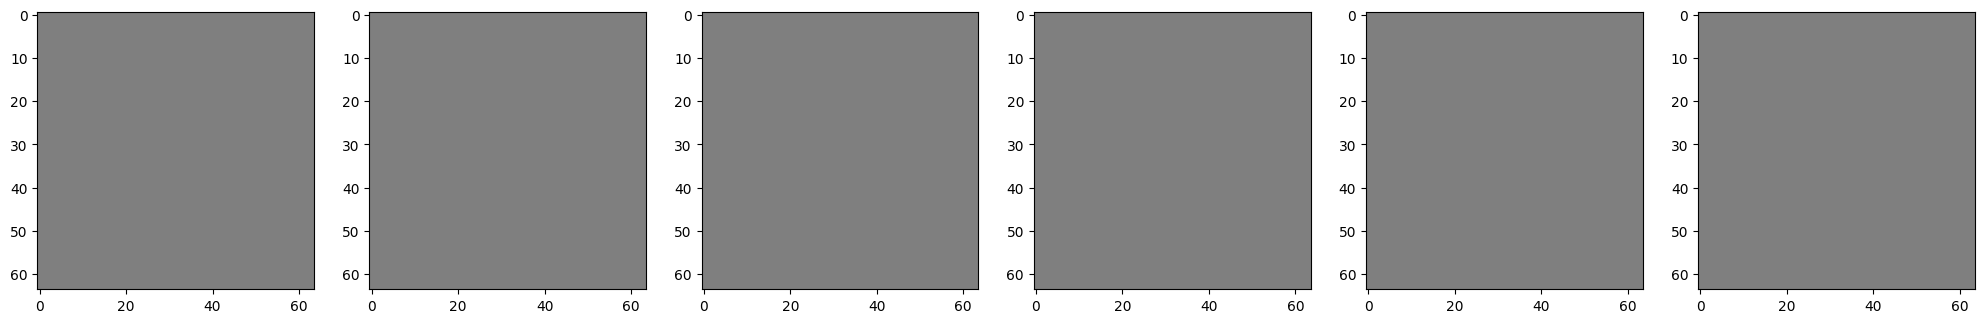

In [17]:
img_rows = 1
img_cols = 6
plt.figure(figsize = (25, 25))
for i in range(6) :
    plt.subplot(img_rows, img_cols, i+1)
    plt.imshow(img[0][i], cmap = 'viridis', vmin = -1, vmax = 1)
    #plt.axis('off')
plt.show()

Build Discriminator

In [18]:
def build_discriminator() :
    model = Sequential()

    model.add(Conv3D(filters = 32, 
                    kernel_size = (3*3*3), 
                    input_shape = (6, 64, 64, 3),
                    padding = 'same', 
                    activation = LeakyReLU(alpha = 0.01)
                    ))
    model.add(BatchNormalization())

    model.add(Conv3D(filters = 32, 
                    kernel_size = (3*3*3), 
                    padding = 'same', 
                    activation = LeakyReLU(alpha = 0.01)
                    ))
    model.add(BatchNormalization())

    model.add(Conv3D(filters = 32, 
                    kernel_size = (3*3*3), 
                    padding = 'same', 
                    activation = LeakyReLU(alpha = 0.01)
                    ))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

    return model

In [19]:
img.shape

(1, 6, 64, 64, 3)

In [20]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1 (Conv3D)           (None, 6, 64, 64, 32)     1889600   
                                                                 
 batch_normalization_3 (Batc  (None, 6, 64, 64, 32)    128       
 hNormalization)                                                 
                                                                 
 conv3d_2 (Conv3D)           (None, 6, 64, 64, 32)     20155424  
                                                                 
 batch_normalization_4 (Batc  (None, 6, 64, 64, 32)    128       
 hNormalization)                                                 
                                                                 
 conv3d_3 (Conv3D)           (None, 6, 64, 64, 32)     20155424  
                                                                 
 batch_normalization_5 (Batc  (None, 6, 64, 64, 32)   

In [21]:
discriminator.predict(img)

1/1 [==============================] - 1s 816ms/step


array([[0.50154907]], dtype=float32)

Training Loop

        Test train

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [24]:
# from keras import Input, Model

# # 創建generator跟discriminator
# generator = build_generator()
# discriminator = build_discriminator()

# # 編譯discriminator
# discriminator.compile(loss = 'BinaryCrossentropy', optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5))

# # 創建GAN
# discriminator.trainable = False
# gan_input = Input(shape = (6, 64, 64, 3))
# input = generator(gan_input)
# gan_output = discriminator(input)
# gan = Model(gan_input, gan_output)
# gan.compile(loss = 'BinaryCrossentropy', optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5))

# # Training Loop
# batch_size = 6
# epochs = 10
# real_image_number = 6
# img_iterator = iter(image_dataset)
# y = np.array([])

# for epoch in range(epochs) :
#     # 生成噪音
#     noise = np.random.normal(0, 1, size = [1, 6, 64, 64, 3])
#     print("Noise 1")

#     # 生成fake image
#     generated_image = generator.predict(noise)
#     print("Generated fake image")

#     # 從dataset中選擇real image
#     img1 = img_iterator.get_next()
#     img2 = img_iterator.get_next()
#     img3 = img_iterator.get_next()
#     img4 = img_iterator.get_next()
#     img5 = img_iterator.get_next()
#     img6 = img_iterator.get_next()
#     real_image = np.concatenate((img1, img2, img3, img4, img5, img6), axis = 0)
#     real_image = real_image.reshape(1, *real_image.shape)
#     print("Choose real data")

#     # 組合real跟fake
#     x = tf.concat([real_image, generated_image], axis = 0)
#     print("Combind real and fake")

#     # 分標籤, real為1, fake為0
#     y = tf.concat([tf.ones_like(real_image), tf.zeros_like(generated_image)], axis = 0)
#     print("Labeling, real is 1, fake is 0")

#     # 訓練discriminator
#     d_loss = discriminator.train_on_batch(x, y)
#     print("Train discirminator")

#     # 生成噪音
#     noise = np.random.normal(0, 1, size = [batch_size, 6, 64, 64, 3])
#     print("Noise 2")

#     # 創建標籤 : 誤導discriminator，所以全為1(real)
#     y = np.ones([batch_size, 1])
#     print("Labeling again to misleading discriminator")

#     # 訓練generator
#     g_loss = gan.train_on_batch(noise, y)
#     print("Train generator")

#     print(f"Epoch {epoch}, 鑑別器損失: {d_loss}, 生成器損失: {g_loss}")



In [23]:
noise = np.random.normal(0, 1, size = [1, 6, 64, 64, 3])
print("Noise 1")

# 生成fake image
generated_image = generator.predict(noise)

img_iterator = iter(image_dataset)
img1 = img_iterator.get_next()
img2 = img_iterator.get_next()
img3 = img_iterator.get_next()
img4 = img_iterator.get_next()
img5 = img_iterator.get_next()
img6 = img_iterator.get_next()
real_image = tf.concat((img1, img2, img3, img4, img5, img6), axis = 0)
real_image = real_image[np.newaxis, :, :, :, :,]
#real_image = real_image.reshape(1, *real_image.shape)
print("Choose real data")

# 組合real跟fake
#x = tf.concat([real_image, generated_image], axis = 0)


Noise 1
1/1 [==============================] - 0s 46ms/step
Choose real data


In [24]:
len(real_image[0])

6

In [25]:
img_iterator = iter(image_dataset)
img1 = img_iterator.get_next()
img2 = img_iterator.get_next()
img3 = img_iterator.get_next()
img4 = img_iterator.get_next()
img5 = img_iterator.get_next()
img6 = img_iterator.get_next()
real_image = np.concatenate((img1, img2, img3, img4, img5, img6), axis = 0)
real_image = real_image.reshape(1, *real_image.shape)
real_image.shape

(1, 6, 64, 64, 3)

Setup Losses and Optimizers

In [26]:
# determine g & d's optimizer
generator_opt = Adam(learning_rate=0.0001)
discirminator_opt = Adam(learning_rate=0.00001)
# determine g & d's losses
generator_loss = BinaryCrossentropy()
discriminator_loss = BinaryCrossentropy()

Build Subclassed Model

In [27]:
# improting the base model class to subclass our training step
from tensorflow.keras.models import Model

In [29]:
class WeatherGAN(Model) : 
    # *args = any positional arg, **kwargs = keyboard args, those two parameters are make our function flexible
    def __init__(self, generator, discriminator, *args, **kwargs) :
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attribute for gen and dis
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, generator_opt, discirminator_opt, generator_loss, discriminator_loss, *args, **kwargs) :
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for optimizer and losses
        self.generator_opt = generator_opt
        self.discriminator_opt = discirminator_opt
        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss

    def train_step(self, batch) :
        # Get the data
        #real_images = batch
        img_iterator = iter(image_dataset)
        img1 = img_iterator.get_next()
        img2 = img_iterator.get_next()
        img3 = img_iterator.get_next()
        img4 = img_iterator.get_next()
        img5 = img_iterator.get_next()
        img6 = img_iterator.get_next()
        real_images = tf.concat((img1, img2, img3, img4, img5, img6), axis = 0)
        real_images = real_images[np.newaxis, :, :, :, :,]
        # Use generator to prediction fake image
        fake_images = self.generator(tf.random.normal((1, 6, 64, 64, 3)), training = False)

        # Train the discriminator
        with tf.GradientTape() as d_tape :
            # Pass the real and fake images to the discriminator model
            #real_images = tf.transpose(real_images, perm=[0, 3, 2, 1]) # Change the dimension to (None, 3, 256, 256)
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            yhat_real_fake = tf.concat([yhat_real, yhat_fake], axis = 0) # Predictions(label) from discriminator

            # Create labels for the real and fake image
            y_real_fake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0) # Actual label, real image label = 0, fake image label = 1

            # Add some noise to the TRUE outputs
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real)) # Uniform distribution
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_real_fake += tf.concat([noise_real, noise_fake], axis = 0)

            # Calculate loss - BinaryCorss
            total_d_loss = self.discriminator_loss(y_real_fake, yhat_real_fake)

        # Apply backpropagation, nn learn. trainable_variables = the variable we want to calculate the gradients
        d_gradients = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) # Calculate gradient
        self.discriminator_opt.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables)) # Apply gradients using optimizer

        # Train the generator
        with tf.GradientTape() as g_tape :
            # Generator some nwe images
            gene_images = self.generator(tf.random.normal((1, 6, 64, 64, 3)), training = True)

            # Create the predicted labels, running our gene_images through the discriminator
            predicted_labels = self.discriminator(gene_images, training = False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.generator_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backpropagation
        g_gradients = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.generator_opt.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

        return {"discriminator_loss":total_d_loss, "generator_loss":total_g_loss}
    # test & evaluation something
    def test_step(self) :
            pass
    

In [30]:
# Create instance of subclass model
weatherGan = WeatherGAN(generator, discriminator)

# Compile the model
weatherGan.compile(generator_opt, discirminator_opt, generator_loss, discriminator_loss)

Build Callback

In [31]:
# import os -> helps with folder navigation (import previously)
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback # Create out own custom callback on epoch

In [32]:
class ModelMonitor(Callback) :
    def __init__(self, num_img = 1, latent_dim = (6, 64, 64, 3)) : # latent_dim -> the random value that i passing to generator to generator a random image, num_img -> how much need to generate
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs = None) :
        random_latent_vectors = tf.random.uniform((self.num_img, *self.latent_dim))
        generated_img = self.model.generator(random_latent_vectors)
        generated_img *= 255
        generated_img.numpy()
        for i in range(self.num_img) :
            for j in range(len(generated_image[i])) :
                img = array_to_img(generated_img[i][j])
                img.save(os.path.join('generated_images_LSTM', f'generated_img_{epoch}_{j}.png'))


Train

In [33]:
# Recommend 2000 epochs
#hist = weatherGan.fit(train, batch_size=8, epochs=20)
hist = weatherGan.fit(image_dataset, batch_size=60, epochs=10, callbacks=[ModelMonitor()])

Epoch 1/10
840/840 [==============================] - 6149s 7s/step - discriminator_loss: 0.7458 - generator_loss: 0.0707
Epoch 2/10
840/840 [==============================] - 6088s 7s/step - discriminator_loss: 0.2964 - generator_loss: 0.0423
Epoch 3/10
840/840 [==============================] - 6078s 7s/step - discriminator_loss: 0.3285 - generator_loss: 0.3361
Epoch 4/10
840/840 [==============================] - 6069s 7s/step - discriminator_loss: 0.2950 - generator_loss: 0.0284
Epoch 5/10
840/840 [==============================] - 6077s 7s/step - discriminator_loss: 0.2895 - generator_loss: 0.0302
Epoch 6/10
840/840 [==============================] - 6065s 7s/step - discriminator_loss: 0.2800 - generator_loss: 0.1766
Epoch 7/10
840/840 [==============================] - 6073s 7s/step - discriminator_loss: 0.2773 - generator_loss: 1.0911
Epoch 8/10
840/840 [==============================] - 6073s 7s/step - discriminator_loss: 0.2847 - generator_loss: 0.8671
Epoch 9/10
840/840 [====